In [1]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask

# Path to the shapefile
shp_path = 'G:\\Hangkai\\Global forest edge\\Continent_map\\Export_Output.shp'

# Reading the shapefile using geopandas
gdf = gpd.read_file(shp_path)

print(gdf)

   OBJECTID      CONTINENT          SQMI          SQKM   Shape_Leng   
0         1         Africa  1.158346e+07  3.000115e+07   426.208612  \
1         2           Asia  1.731728e+07  4.485173e+07  2331.623746   
2         3      Australia  2.973612e+06  7.701651e+06   252.165311   
3         4  North America  9.339528e+06  2.418936e+07  3954.892430   
4         5        Oceania  1.656787e+05  4.291076e+05   221.581942   
5         6  South America  6.856255e+06  1.775769e+07   622.552582   
6         7     Antarctica  4.754809e+06  1.231495e+07  1587.227698   
7         8         Europe  3.821854e+06  9.898597e+06  1596.706533   

    Shape_Area                                           geometry  
0  2559.073098  MULTIPOLYGON (((35.48832 -21.68500, 35.45222 -...  
1  5432.085227  MULTIPOLYGON (((150.89360 -10.64874, 150.88053...  
2   695.539921  MULTIPOLYGON (((158.88218 -54.71139, 158.87967...  
3  3707.418684  MULTIPOLYGON (((-81.67847 7.38861, -81.64945 7...  
4    42.565470  MULT

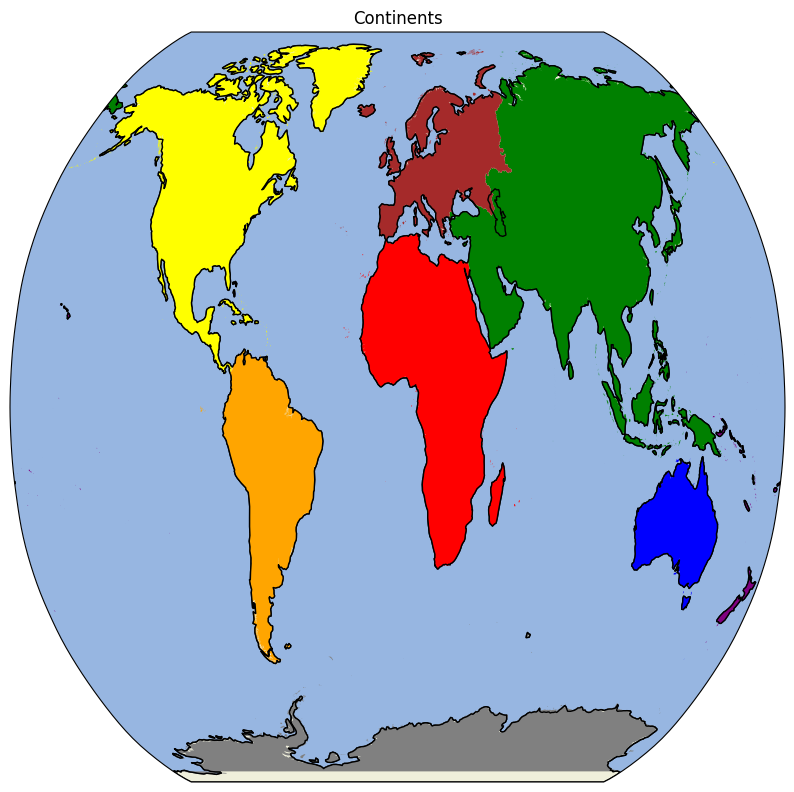

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd

# Reading the shapefile using geopandas
shp_path = 'G:\\Hangkai\\Global forest edge\\Continent_map\\Export_Output.shp'
gdf = gpd.read_file(shp_path)

# Creating a new matplotlib figure and axes with a specified CRS (PlateCarree)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.Robinson()})

# Setting global extent
ax.set_global()

# Adding natural features for oceans, land, and coastlines
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)

# Defining colors for each continent
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'grey', 'brown']

# Plotting each continent with a different color
for i, continent in enumerate(gdf['CONTINENT'].unique()):
    gdf[gdf['CONTINENT'] == continent].plot(ax=ax, color=colors[i], transform=ccrs.PlateCarree())

plt.title('Continents')
plt.show()

In [4]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask

# Path to the shapefile
shp_path = 'G:\\Hangkai\\Global forest edge\\Continent_map\\Export_Output.shp'

# Reading the shapefile using geopandas
gdf = gpd.read_file(shp_path)

# Path to the raster file
tif_path = 'G:\\Hangkai\\Global forest edge\\001degree\\new\\dd.tif'

# Function to count forest edges in a continent
def count_forest_edge(continent_shape, raster_path):
    with rasterio.open(raster_path) as src:
        out_image, out_transform = mask(src, [continent_shape], crop=True)
    return (out_image > 0).sum()  # Assuming forest edges are represented by non-zero values

# Applying the function to each continent in the shapefile
gdf['forest_edge_count'] = gdf['geometry'].apply(lambda x: count_forest_edge(x, tif_path))

# Printing the result
print("dd")
print(gdf[['CONTINENT', 'forest_edge_count']])

# Total forest edge count globally
total_forest_edge = gdf['forest_edge_count'].sum()

# Calculating the share for each continent
gdf['forest_edge_share'] = gdf['forest_edge_count'] / total_forest_edge * 100

# Printing the result with share
print(gdf[['CONTINENT', 'forest_edge_count', 'forest_edge_share']])

dd
       CONTINENT  forest_edge_count
0         Africa            6569018
1           Asia           10225998
2      Australia             599215
3  North America            8169915
4        Oceania             169756
5  South America            4827817
6     Antarctica                  0
7         Europe            5273161
       CONTINENT  forest_edge_count  forest_edge_share
0         Africa            6569018          18.331352
1           Asia           10225998          28.536437
2      Australia             599215           1.672156
3  North America            8169915          22.798779
4        Oceania             169756           0.473717
5  South America            4827817          13.472396
6     Antarctica                  0           0.000000
7         Europe            5273161          14.715163


In [5]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask

# Path to the shapefile
shp_path = 'G:\\Hangkai\\Global forest edge\\Continent_map\\Export_Output.shp'

# Reading the shapefile using geopandas
gdf = gpd.read_file(shp_path)

# Path to the raster file
tif_path = 'G:\\Hangkai\\Global forest edge\\001degree\\new\\di.tif'

# Function to count forest edges in a continent
def count_forest_edge(continent_shape, raster_path):
    with rasterio.open(raster_path) as src:
        out_image, out_transform = mask(src, [continent_shape], crop=True)
    return (out_image > 0).sum()  # Assuming forest edges are represented by non-zero values

# Applying the function to each continent in the shapefile
gdf['forest_edge_count'] = gdf['geometry'].apply(lambda x: count_forest_edge(x, tif_path))

# Printing the result
print("di")
print(gdf[['CONTINENT', 'forest_edge_count']])

# Total forest edge count globally
total_forest_edge = gdf['forest_edge_count'].sum()

# Calculating the share for each continent
gdf['forest_edge_share'] = gdf['forest_edge_count'] / total_forest_edge * 100

# Printing the result with share
print(gdf[['CONTINENT', 'forest_edge_count', 'forest_edge_share']])

di
       CONTINENT  forest_edge_count
0         Africa            5433049
1           Asia           15806544
2      Australia             889699
3  North America           11444495
4        Oceania             169901
5  South America            4329558
6     Antarctica                  0
7         Europe            8061784
       CONTINENT  forest_edge_count  forest_edge_share
0         Africa            5433049          11.776407
1           Asia           15806544          34.261480
2      Australia             889699           1.928467
3  North America           11444495          24.806519
4        Oceania             169901           0.368269
5  South America            4329558           9.384535
6     Antarctica                  0           0.000000
7         Europe            8061784          17.474323


In [6]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask

# Path to the shapefile
shp_path = 'G:\\Hangkai\\Global forest edge\\Continent_map\\Export_Output.shp'

# Reading the shapefile using geopandas
gdf = gpd.read_file(shp_path)

# Path to the raster file
tif_path = 'G:\\Hangkai\\Global forest edge\\001degree\\new\\id.tif'

# Function to count forest edges in a continent
def count_forest_edge(continent_shape, raster_path):
    with rasterio.open(raster_path) as src:
        out_image, out_transform = mask(src, [continent_shape], crop=True)
    return (out_image > 0).sum()  # Assuming forest edges are represented by non-zero values

# Applying the function to each continent in the shapefile
gdf['forest_edge_count'] = gdf['geometry'].apply(lambda x: count_forest_edge(x, tif_path))

# Printing the result
print("id")
print(gdf[['CONTINENT', 'forest_edge_count']])

# Total forest edge count globally
total_forest_edge = gdf['forest_edge_count'].sum()

# Calculating the share for each continent
gdf['forest_edge_share'] = gdf['forest_edge_count'] / total_forest_edge * 100

# Printing the result with share
print(gdf[['CONTINENT', 'forest_edge_count', 'forest_edge_share']])

id
       CONTINENT  forest_edge_count
0         Africa            5711982
1           Asia           10553790
2      Australia             542289
3  North America            7991412
4        Oceania             162099
5  South America            4480943
6     Antarctica                  0
7         Europe            5659881
       CONTINENT  forest_edge_count  forest_edge_share
0         Africa            5711982          16.272342
1           Asia           10553790          30.065725
2      Australia             542289           1.544877
3  North America            7991412          22.766002
4        Oceania             162099           0.461789
5  South America            4480943          12.765348
6     Antarctica                  0           0.000000
7         Europe            5659881          16.123916


In [7]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask

# Path to the shapefile
shp_path = 'G:\\Hangkai\\Global forest edge\\Continent_map\\Export_Output.shp'

# Reading the shapefile using geopandas
gdf = gpd.read_file(shp_path)

# Path to the raster file
tif_path = 'G:\\Hangkai\\Global forest edge\\001degree\\new\\ii.tif'

# Function to count forest edges in a continent
def count_forest_edge(continent_shape, raster_path):
    with rasterio.open(raster_path) as src:
        out_image, out_transform = mask(src, [continent_shape], crop=True)
    return (out_image > 0).sum()  # Assuming forest edges are represented by non-zero values

# Applying the function to each continent in the shapefile
gdf['forest_edge_count'] = gdf['geometry'].apply(lambda x: count_forest_edge(x, tif_path))

# Printing the result
print("ii")
print(gdf[['CONTINENT', 'forest_edge_count']])

# Total forest edge count globally
total_forest_edge = gdf['forest_edge_count'].sum()

# Calculating the share for each continent
gdf['forest_edge_share'] = gdf['forest_edge_count'] / total_forest_edge * 100

# Printing the result with share
print(gdf[['CONTINENT', 'forest_edge_count', 'forest_edge_share']])

ii
       CONTINENT  forest_edge_count
0         Africa            5016847
1           Asia           14632142
2      Australia             998435
3  North America           10883460
4        Oceania             162912
5  South America            4165324
6     Antarctica                  0
7         Europe            7417357
       CONTINENT  forest_edge_count  forest_edge_share
0         Africa            5016847          11.592549
1           Asia           14632142          33.810844
2      Australia             998435           2.307108
3  North America           10883460          25.148674
4        Oceania             162912           0.376445
5  South America            4165324           9.624915
6     Antarctica                  0           0.000000
7         Europe            7417357          17.139466


In [8]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask

# Path to the shapefile
shp_path = 'G:\\Hangkai\\Global forest edge\\Continent_map\\Export_Output.shp'

# Reading the shapefile using geopandas
gdf = gpd.read_file(shp_path)

# Path to the raster file
tif_path = 'G:\\Hangkai\\Global forest edge\\001degree\\new\\stable.tif'

# Function to count forest edges in a continent
def count_forest_edge(continent_shape, raster_path):
    with rasterio.open(raster_path) as src:
        out_image, out_transform = mask(src, [continent_shape], crop=True)
    return (out_image > 0).sum()  # Assuming forest edges are represented by non-zero values

# Applying the function to each continent in the shapefile
gdf['forest_edge_count'] = gdf['geometry'].apply(lambda x: count_forest_edge(x, tif_path))

# Printing the result
print("stable")
print(gdf[['CONTINENT', 'forest_edge_count']])

# Total forest edge count globally
total_forest_edge = gdf['forest_edge_count'].sum()

# Calculating the share for each continent
gdf['forest_edge_share'] = gdf['forest_edge_count'] / total_forest_edge * 100

# Printing the result with share
print(gdf[['CONTINENT', 'forest_edge_count', 'forest_edge_share']])

stable
       CONTINENT  forest_edge_count
0         Africa            9042043
1           Asia           22990782
2      Australia            2227061
3  North America           16107740
4        Oceania             293055
5  South America            7623462
6     Antarctica                  0
7         Europe            9981673
       CONTINENT  forest_edge_count  forest_edge_share
0         Africa            9042043          13.245345
1           Asia           22990782          33.678323
2      Australia            2227061           3.262337
3  North America           16107740          23.595616
4        Oceania             293055           0.429285
5  South America            7623462          11.167320
6     Antarctica                  0           0.000000
7         Europe            9981673          14.621774
